In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.rc={'figure.figsize': (24, 12)}

# Carrega os datasets 

In [2]:
cadastroDF = pd.read_csv('./datasets/Customer Acqusition.csv')
cadastroDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
No          100 non-null int64
Customer    100 non-null object
Age         100 non-null int64
City        100 non-null object
Product     100 non-null object
Limit       100 non-null float64
Company     100 non-null object
Segment     100 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [3]:
gastoDF = pd.read_csv('./datasets/spend.csv')
gastoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
Sl No:      1500 non-null int64
Customer    1500 non-null object
Month       1500 non-null object
Type        1500 non-null object
Amount      1500 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


# Análise de compras por tipo

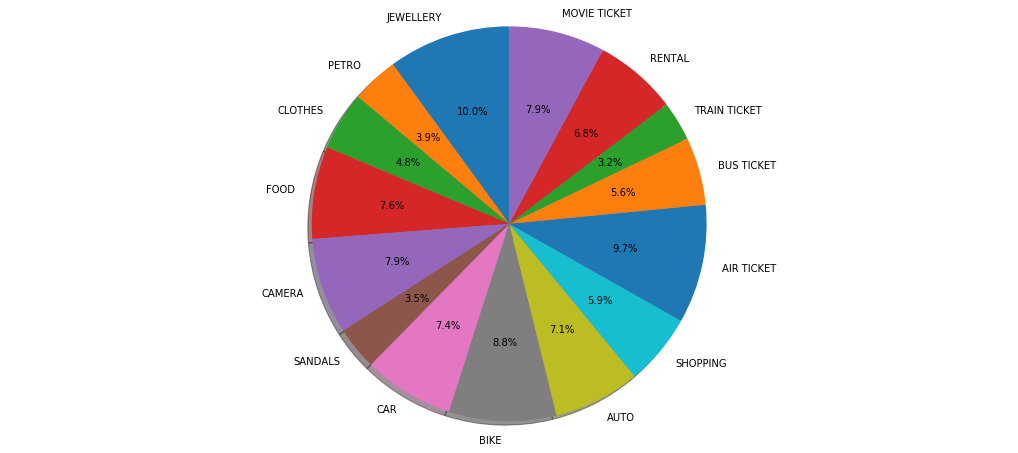

In [12]:
labels = np.array(gastoDF['Type'].unique())
sizes = np.array(gastoDF.groupby('Type')['Customer'].nunique())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

plt.show()

# Gasto médio por categoria

In [9]:
mediaGastoDF = gastoDF.groupby('Type') \
       .agg({'Amount':'mean'}) \
       .rename(columns={'Amount':'mean_amount'}) \
       .reset_index() \
       .round(2)

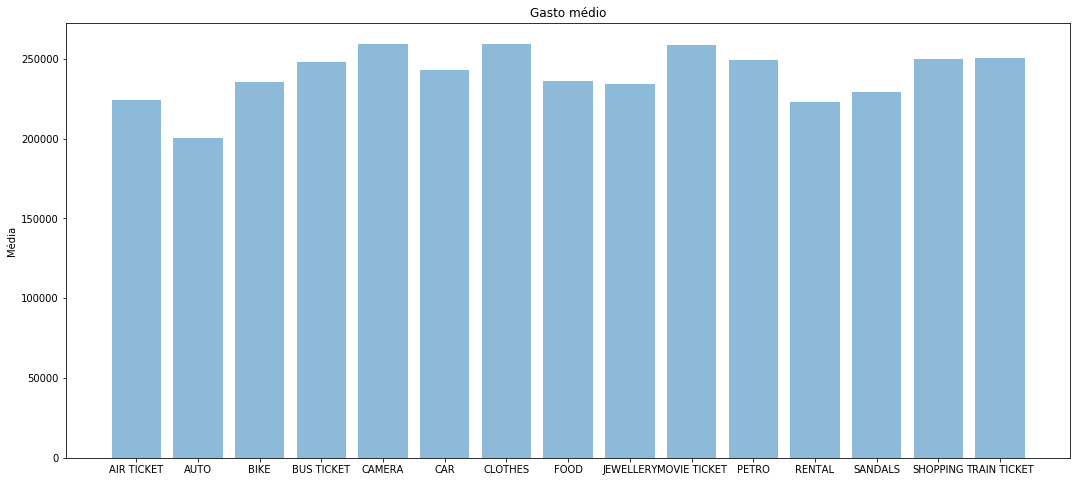

In [16]:
categorias = np.array(mediaGastoDF['Type'])
y_pos = np.arange(len(categorias))
medias = np.array(mediaGastoDF['mean_amount'])

plt.bar(y_pos, medias, align='center', alpha=0.5)
plt.xticks(y_pos, categorias)
plt.ylabel('Média')
plt.title('Gasto médio')

plt.show()

# Histograma de Clientes por idade

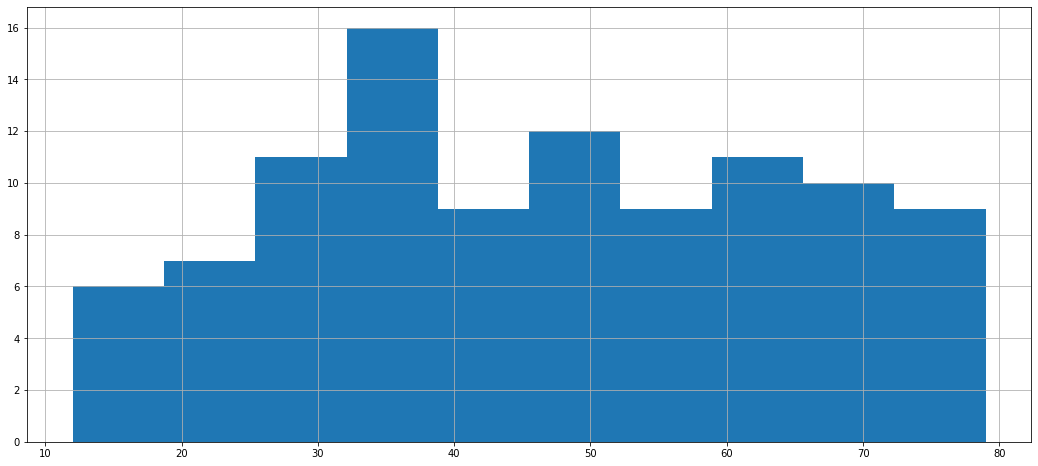

In [14]:
cadastroDF['Age'].hist()

# Distribuição de clientes por Produto

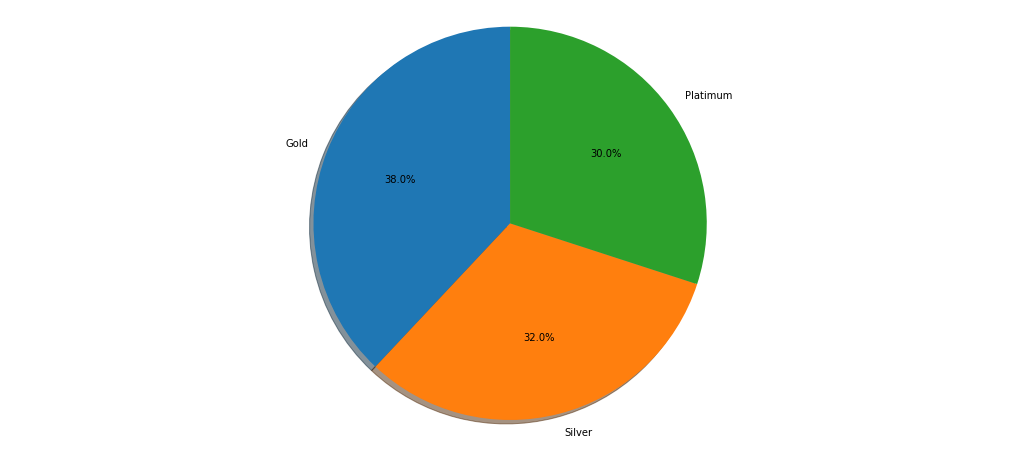

In [15]:
labels = np.array(cadastroDF['Product'].unique())
sizes = np.array(cadastroDF.groupby('Product')['Customer'].nunique())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()